In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [72]:
df = pd.read_csv("salaries_cyber_model.csv")
df.head()

,experience_level,salary,remote_ratio,company_size
0,EN,63000,50,S
1,MI,95000,0,M
2,MI,70000,0,M
3,EX,315000,100,L
4,SE,220000,100,M


In [73]:
df = df.join( pd.get_dummies(df["experience_level"]) )
df = df.join( pd.get_dummies(df["company_size"], prefix="company_size_") )


In [74]:
df.head()

,experience_level,salary,remote_ratio,company_size,EN,EX,MI,SE,company_size__L,company_size__M,company_size__S
0,EN,63000,50,S,1,0,0,0,0,0,1
1,MI,95000,0,M,0,0,1,0,0,1,0
2,MI,70000,0,M,0,0,1,0,0,1,0
3,EX,315000,100,L,0,1,0,0,1,0,0
4,SE,220000,100,M,0,0,0,1,0,1,0


In [75]:
df.drop("experience_level", axis=1, inplace=True)
df.drop("remote_ratio", axis=1, inplace=True)
df.drop("company_size", axis=1, inplace=True)

In [76]:
df.head()

,salary,EN,EX,MI,SE,company_size__L,company_size__M,company_size__S
0,63000,1,0,0,0,0,0,1
1,95000,0,0,1,0,0,1,0
2,70000,0,0,1,0,0,1,0
3,315000,0,1,0,0,1,0,0
4,220000,0,0,0,1,0,1,0


# Test and Training Split

In [77]:
from sklearn.model_selection import train_test_split

y = df.loc[:, "salary"]
X = df.drop("salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123, 
)

# Validation split

In [78]:
# Creating evaluation data from 20% of the original data

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25
)

# Scaling

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

y_train = scaler.fit_transform( y_train.values.reshape(-1, 1) )
y_test = scaler.transform( y_test.values.reshape(-1, 1) )
y_val = scaler.transform( y_val.values.reshape(-1, 1) )

y_train

array([[-0.83126109],
       [-1.05251071],
       [-0.49201168],
       [ 0.02423743],
       [ 0.12748725],
       [ 0.42838673],
       [-0.16751224],
       [-0.44776175],
       [ 0.14223723],
       [-0.72801127],
       [ 1.52873483],
       [-0.68376135],
       [-1.27376033],
       [ 1.01248572],
       [-0.49938667],
       [-0.75751122],
       [ 0.87973595],
       [ 2.4137333 ],
       [ 0.20123712],
       [ 2.78248266],
       [ 0.42838673],
       [ 0.7912361 ],
       [-0.68376135],
       [-0.45661174],
       [ 0.93873585],
       [ 0.58591646],
       [ 0.7912361 ],
       [-0.02001249],
       [-0.66134138],
       [ 0.05373738],
       [-0.56576155],
       [-0.5377366 ],
       [-0.09376237],
       [-0.16751224],
       [ 0.48148664],
       [ 0.20123712],
       [-0.72063628],
       [ 0.0979873 ],
       [-0.16751224],
       [-0.66901137],
       [ 0.56998649],
       [-0.09376237],
       [-0.94926089],
       [ 0.20123712],
       [-0.44776175],
       [-1

# Modeling

## Linear Regression as Baseline

In [80]:
X_train

,EN,EX,MI,SE,company_size__L,company_size__M,company_size__S
747,1,0,0,0,1,0,0
857,1,0,0,0,0,0,1
109,0,0,0,1,1,0,0
526,0,0,0,1,1,0,0
65,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...
198,0,0,0,1,0,1,0
537,0,0,1,0,1,0,0
439,0,0,1,0,0,0,1
14,1,0,0,0,1,0,0


In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_val)
reg.score(X_val, y_val), mean_squared_error(y_val, y_pred, squared=True)

(0.32633875671605717, 0.45498201355913126)

In [ ]:
import pickle

f = open("./models/linear_regression.sav", "wb")
pickle.dump(reg, f)
f.close()

In [84]:
y_pred = reg.predict( [[1, 0, 0, 0, 1, 0, 0]] )
salary = scaler.inverse_transform( y_pred )
salary

e:\Programme\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[79424.78706306]])

## Polynomial Features

In [31]:
from sklearn.preprocessing import PolynomialFeatures

for degree in range(2, 14):
    # Fit and transform data
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X_train)

    X_eval_transformed = poly_features.transform(X_eval)

    # Fit model on transformed data
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y_train)

    # Evaluate model
    y_pred = lin_reg.predict(X_eval_transformed)
    mse = mean_squared_error(y_eval, y_pred, squared=True)

    print(f"Degree of Polynom: {degree}, MSE: {mse}")

Degree of Polynom: 2, MSE: 5.943031453024743e+24
Degree of Polynom: 3, MSE: 1.5594982921145765e+25
Degree of Polynom: 4, MSE: 7.084791095222776e+24
Degree of Polynom: 5, MSE: 4.671071151531031e+25
Degree of Polynom: 6, MSE: 3.764742750040559e+24
Degree of Polynom: 7, MSE: 5.06456494484265e+24
Degree of Polynom: 8, MSE: 3.7834808525459363e+24
Degree of Polynom: 9, MSE: 1.0800809237243628e+23
Degree of Polynom: 10, MSE: 4.259187570987126e+25
Degree of Polynom: 11, MSE: 4.6827767354813393e+24
Degree of Polynom: 12, MSE: 1.9120787775552895e+23
Degree of Polynom: 13, MSE: 3.0643497139890384e+24


## Ridge Regression

In [33]:
from sklearn.linear_model import Ridge, RidgeCV

#ridge_reg = Ridge( alpha=0.1, solver="cholesky" )
#ridge_reg.fit(X_train, y_train)
ridge_reg = RidgeCV(alphas=(0.0001, 0.001, 0.01, 0.1, 1, 2, 3)).fit(X_train, y_train)

y_pred = ridge_reg.predict( X_eval )
mean_squared_error(y_eval, y_pred, squared=True)

0.9101521905927887

In [34]:
ridge_reg.alpha_

1.0

In [112]:
ridge_reg.best_score_

-0.6035605016572188

## Lasso Regression

In [35]:
from sklearn.linear_model import LassoCV

reg = LassoCV(cv=5).fit(X_train, y_train)

y_pred = reg.predict( X_eval )
mean_squared_error(y_eval, y_pred, squared=True)

e:\Programme\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9086181604992466

## Deep Learning

In [93]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

model = Sequential([
    Dense(32, input_dim=7, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1)
])

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01))

history = model.fit(
    x=X_train,
    y=y_train,
    epochs=20,
    validation_data=(X_val, y_val),
)

Epoch 1/20
17/17 [==============================] - 0s 10ms/step - loss: 0.8142 - val_loss: 0.5112
Epoch 2/20
17/17 [==============================] - 0s 3ms/step - loss: 0.7240 - val_loss: 0.4617
Epoch 3/20
17/17 [==============================] - 0s 3ms/step - loss: 0.6587 - val_loss: 0.4799
Epoch 4/20
17/17 [==============================] - 0s 3ms/step - loss: 0.6506 - val_loss: 0.4650
Epoch 5/20
17/17 [==============================] - 0s 3ms/step - loss: 0.6559 - val_loss: 0.4908
Epoch 6/20
17/17 [==============================] - 0s 3ms/step - loss: 0.6623 - val_loss: 0.4648
Epoch 7/20
17/17 [==============================] - 0s 3ms/step - loss: 0.6428 - val_loss: 0.4643
Epoch 8/20
17/17 [==============================] - 0s 3ms/step - loss: 0.6643 - val_loss: 0.4743
Epoch 9/20
17/17 [==============================] - 0s 3ms/step - loss: 0.6468 - val_loss: 0.4604
Epoch 10/20
17/17 [==============================] - 0s 3ms/step - loss: 0.6413 - val_loss: 0.4701
Epoch 11/20
17/17 

In [39]:
X_train

,EN,EX,MI,SE,company_size__L,company_size__M,company_size__S
533,0,0,1,0,1,0,0
651,0,0,1,0,0,1,0
40,0,0,0,1,0,1,0
768,0,0,1,0,1,0,0
870,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...
453,1,0,0,0,0,0,1
699,0,1,0,0,1,0,0
562,0,0,0,1,1,0,0
63,0,0,0,1,0,1,0


In [42]:
# Entry level, large company
scaler.inverse_transform( model.predict([[1, 0, 0, 0, 1, 0, 0]]) )

1/1 [==============================] - 0s 42ms/step


array([[66583.055]], dtype=float32)

In [43]:
!pip install -q -U keras-tuner

In [95]:
import keras_tuner as kt

def model_builder(hp):
    model = Sequential([
        Dense(32, input_dim=7, activation="relu"),
        Dense(16, activation="relu"),
        Dense(1)
    ])

    hp_learning_rate = hp.Choice("learning_rate", values=[0.1, 0.01, 0.001, 0.00001])
    model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=hp_learning_rate))

    return model


tuner = kt.Hyperband(
    model_builder,
    objective=kt.Objective("val_loss", direction="min"),
    max_epochs=30,
    factor=3,
    directory="hp_tuning",
    project_name="cyber_salary_estimator"
)

tuner.search(
    X_train, 
    y_train, 
    epochs=50,
    validation_data=(X_val, y_val),
)

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
best_learning_rate = best_hps["learning_rate"]

print(f"Best learning rate: {best_learning_rate}")

INFO:tensorflow:Reloading Tuner from hp_tuning\cyber_salary_estimator\tuner0.json
INFO:tensorflow:Oracle triggered exit
Best learning rate: 0.01


In [46]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_eval, y_eval))

val_rmse_per_epoch = history.history["val_root_mean_squared_error"]
best_epoch = val_rmse_per_epoch.index(min(val_rmse_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/30
17/17 [==============================] - 0s 10ms/step - loss: 0.6737 - root_mean_squared_error: 0.9071 - val_loss: 0.6451 - val_root_mean_squared_error: 1.0994
Epoch 2/30
17/17 [==============================] - 0s 3ms/step - loss: 0.5919 - root_mean_squared_error: 0.8452 - val_loss: 0.5795 - val_root_mean_squared_error: 1.0430
Epoch 3/30
17/17 [==============================] - 0s 3ms/step - loss: 0.5337 - root_mean_squared_error: 0.7911 - val_loss: 0.5497 - val_root_mean_squared_error: 0.9944
Epoch 4/30
17/17 [==============================] - 0s 3ms/step - loss: 0.5127 - root_mean_squared_error: 0.7683 - val_loss: 0.5681 - val_root_mean_squared_error: 1.0147
Epoch 5/30
17/17 [==============================] - 0s 3ms/step - loss: 0.5106 - root_mean_squared_error: 0.7731 - val_loss: 0.5504 - val_root_mean_squared_error: 0.9772
Epoch 6/30
17/17 [==============================] - 0s 3ms/step - loss: 0.5095 - root_mean_squared_error: 0.7651 - val_loss: 0.5726 - val_root_mean_s

In [47]:
hypermodel = tuner.hypermodel.build(best_hps)
hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_data=(X_eval, y_eval))

Epoch 1/19
17/17 [==============================] - 0s 10ms/step - loss: 0.6425 - root_mean_squared_error: 0.8919 - val_loss: 0.6131 - val_root_mean_squared_error: 1.0716
Epoch 2/19
17/17 [==============================] - 0s 3ms/step - loss: 0.5630 - root_mean_squared_error: 0.8212 - val_loss: 0.5799 - val_root_mean_squared_error: 1.0494
Epoch 3/19
17/17 [==============================] - 0s 3ms/step - loss: 0.5301 - root_mean_squared_error: 0.7973 - val_loss: 0.5550 - val_root_mean_squared_error: 0.9945
Epoch 4/19
17/17 [==============================] - 0s 3ms/step - loss: 0.5154 - root_mean_squared_error: 0.7601 - val_loss: 0.5719 - val_root_mean_squared_error: 1.0152
Epoch 5/19
17/17 [==============================] - 0s 3ms/step - loss: 0.5162 - root_mean_squared_error: 0.7761 - val_loss: 0.5520 - val_root_mean_squared_error: 0.9913
Epoch 6/19
17/17 [==============================] - 0s 3ms/step - loss: 0.5096 - root_mean_squared_error: 0.7726 - val_loss: 0.5569 - val_root_mean_s

In [122]:
eval_result = hypermodel.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.5407 - root_mean_squared_error: 0.7213


In [123]:
print("[test loss, test accuracy]:", eval_result)

[test loss, test accuracy]: [0.5406957864761353, 0.721299946308136]


In [124]:
hypermodel.save("./models/hypermodel")

INFO:tensorflow:Assets written to: ./models/hypermodel\assets


# Modeling with one feature

In [126]:
df2 = pd.read_csv("salaries_cyber_model.csv")

In [127]:
df2.head()

,experience_level,salary,remote_ratio,company_size
0,EN,63000,50,S
1,MI,95000,0,M
2,MI,70000,0,M
3,EX,315000,100,L
4,SE,220000,100,M


<AxesSubplot: xlabel='experience_level', ylabel='salary'>

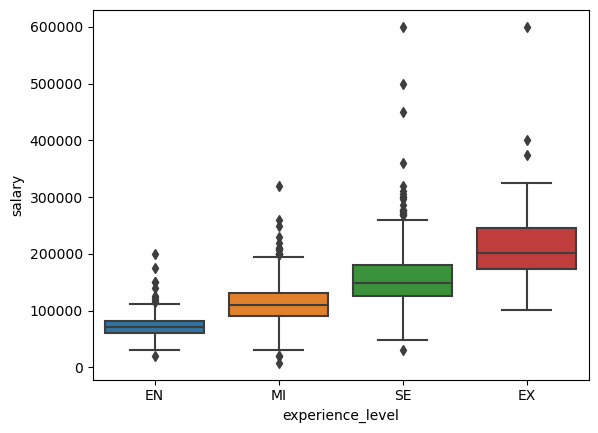

In [129]:
sns.boxplot(
    x = df2["experience_level"],
    y = df2["salary"],
    order=["EN", "MI", "SE", "EX"]
)

In [132]:
quantile25 = df2.groupby("experience_level").quantile(.25)
quantile75 = df2.groupby("experience_level").quantile(.75)

C:\Users\fahri\AppData\Local\Temp\ipykernel_6760\2219739874.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  quantile25 = df2.groupby("experience_level").quantile(.25)
C:\Users\fahri\AppData\Local\Temp\ipykernel_6760\2219739874.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  quantile75 = df2.groupby("experience_level").quantile(.75)


In [143]:
quantile25

,salary,remote_ratio
experience_level,,
EN,60006.0,50.0
EX,172875.0,87.5
MI,89998.0,0.0
SE,125000.0,100.0


In [142]:
quantile25.loc[:, "salary"]["EN"]

60006.0